LSTM 실행하기전에 preprocessed->Feature Engineering 먼저 실행

In [22]:
import pandas as pd
# 파일 경로 설정
merged_data_path = 'C:/Users/82106/Desktop/데이터 분석 프로젝트 2/날씨 빅데이터 콘테스트/데이터/merged_data.csv'
merged_data= pd.read_csv(merged_data_path, encoding='cp949')

### GPU 설정 확인

In [8]:
import tensorflow as tf

# GPU 디바이스 이름 확인
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# GPU 디바이스 세부 정보 확인
tf.config.experimental.list_physical_devices('GPU')

Num GPUs Available:  0


[]

### 하이퍼 파라미터 설정

In [23]:
# 하이퍼파라미터 설정
learning_rate = 0.001
epochs = 100
batch_size = 32

### 데이터 분할

In [24]:
# 필요한 라이브러리 임포트
from sklearn.model_selection import train_test_split

# 특성과 타겟 분리
X = merged_data.drop(['강수량(mm)', '날짜'], axis=1)  # '날짜' 열과 타겟 열 제외
y = merged_data['강수량(mm)']

### 모델 스케일링

In [25]:
from sklearn.preprocessing import MinMaxScaler

# 스케일러 초기화 및 피팅
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


### 시퀀스 데이터 형태로 변환

In [26]:
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps - 1]) 
    return np.array(Xs), np.array(ys)

In [27]:
from sklearn.model_selection import train_test_split
import numpy as np

# 전체 데이터에서 시퀀스 생성
time_steps = 10  # 시퀀스 길이 설정
X_seq, y_seq = create_sequences(X_scaled, y, time_steps)

In [28]:
# 먼저 훈련 데이터와 테스트 데이터로 분할
X_train, X_temp, y_train, y_temp = train_test_split(X_seq, y_seq, test_size=0.4, random_state=42, shuffle=False)

# 테스트 데이터를 검증 데이터와 테스트 데이터로 분할
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False)


In [29]:
print(f"Training data length: {len(X_train)}")
print(f"Validation data length: {len(X_val)}")
print(f"Testing data length: {len(X_test)}")


Training data length: 10795
Validation data length: 3598
Testing data length: 3599


### 손실 함수 정의

In [30]:
import tensorflow as tf

def root_mean_squared_error(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))



### LSTM 모델 

In [32]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 모델 생성
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

c:\Users\82106\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 모델 컴파일

In [33]:
from keras.optimizers import RMSprop
from keras import backend as K

# 학습률 설정
learning_rate = 0.001

# RMSprop 옵티마이저 초기화
optimizer = RMSprop(learning_rate=learning_rate)

# 모델 컴파일
model.compile(optimizer=optimizer,
              loss=root_mean_squared_error,
              metrics=['mae'])


In [34]:
from keras import backend as K

# 모델 훈련
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 8.6778 - mae: 2.7480 - val_loss: 4.7152 - val_mae: 2.5676
Epoch 2/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.6954 - mae: 2.7645 - val_loss: 4.6710 - val_mae: 2.2927
Epoch 3/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.2715 - mae: 2.5291 - val_loss: 4.5759 - val_mae: 2.4257
Epoch 4/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 9.2256 - mae: 2.7639 - val_loss: 4.5060 - val_mae: 2.6069
Epoch 5/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 7.4749 - mae: 2.4324 - val_loss: 4.4146 - val_mae: 2.3580
Epoch 6/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.1568 - mae: 2.2412 - val_loss: 4.3552 - val_mae: 2.3399
Epoch 7/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.4571 - mae: 2.2419 - val_loss: 4.3638 - val_mae: 2.2635
Epoch 8/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.4322 - mae: 2.2773 - val_loss: 4.2845 - val_mae: 2.2306
Epoch 9/50
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - lo

### 훈련 및 검증 손실 시각화

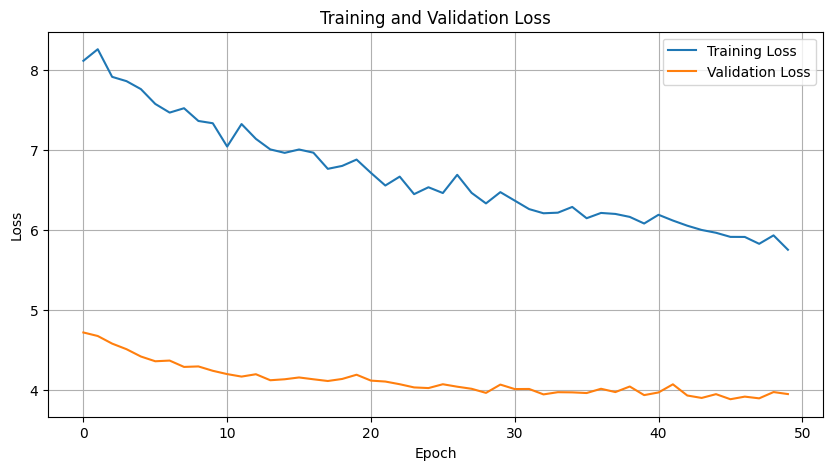

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


손실 감소 추세

훈련 손실: 그래프에서 보듯이 훈련 손실이 지속적으로 감소하고 있습니다. 이는 모델이 훈련 데이터에 대해 지속적으로 학습하고 있음. 초기에 급격하게 감소하다가 점차 완만한 감소 추세.

검증 손실: 검증 손실 역시 감소 추세를 보이고 있으며, 훈련 과정 중 일관되게 훈련 손실보다 높게 유지. 이는 일반적으로 예상되는 현상

### 훈련 및 검증 메트릭 (MAE) 시각화

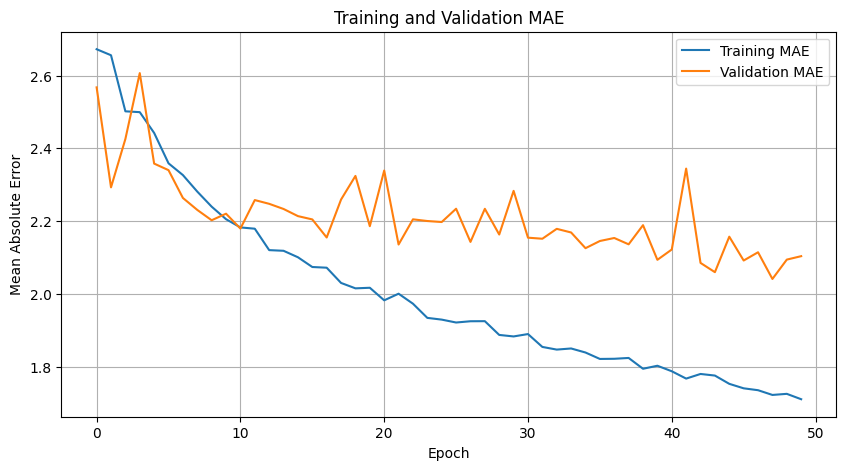

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()


### 전 모델 저장후 불러오기 

In [37]:
model.save('my_lstm_model.keras')

In [38]:
from keras.models import load_model

model = load_model('my_lstm_model.keras', custom_objects={'root_mean_squared_error': root_mean_squared_error})

### 모델 평가

In [39]:
# 모델 평가
test_results = model.evaluate(X_test, y_test, verbose=1)
test_loss, test_metric = test_results[0], test_results[1]  # 이 코드는 메트릭이 하나인 경우를 가정

print(f"Test Loss (RMSE): {test_loss:.3f}")
print(f"Test Metric (e.g., MAE): {test_metric:.3f}")  # 메트릭의 종류에 따라 레이블을 적절히 조정



113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.7533 - mae: 2.6385
Test Loss (RMSE): 4.108
Test Metric (e.g., MAE): 2.086


count    4129.000000
mean        8.690942
std        21.011366
min         0.100000
25%         0.300000
50%         1.500000
75%         6.300000
max       301.500000
Name: 강수량(mm), dtype: float64


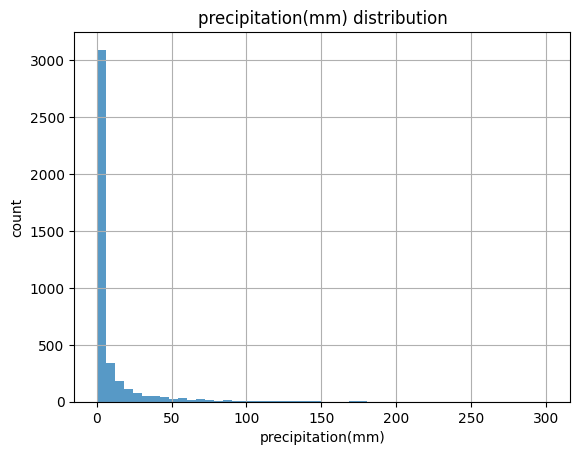

In [40]:
# 0이 아닌 강수량 값만 선택
non_zero_precipitation = merged_data['강수량(mm)'][merged_data['강수량(mm)'] > 0]

# 기술 통계 요약
statistics = non_zero_precipitation.describe()

print(statistics)
# 추가적으로, 강수량 데이터의 분포를 시각화하기 위한 히스토그램도 그릴 수 있습니다.
import matplotlib.pyplot as plt

plt.hist(non_zero_precipitation, bins=50, alpha=0.75)
plt.title('precipitation(mm) distribution')
plt.xlabel('precipitation(mm)')
plt.ylabel('count')
plt.grid(True)
plt.show()

강수량 예측의 경우, RMSE 3.996mm는 데이터의 평균 및 중앙값에 비해 상대적으로 높은 오차를 가짐을 시사. 

이는 특히 낮은 강수량을 보이는 대부분의 날에 대한 예측에서 정확도가 낮을 수 있음을 의미. 

모델 성능을 향상시키기 위해서는 데이터의 추가적인 분석, 예측 모델의 개선, 더 정밀한 특성 엔지니어링 등이 필요